## Project overview
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
There are four datasets:
* <strong>bank-additional-full.csv</strong>  with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
* <strong>bank-additional.csv</strong>  with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
* <strong>bank-full.csv</strong>  with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
* <strong>bank.csv</strong>  with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

* link dataset : <a href="https://archive.ics.uci.edu/ml/datasets/Bank+Marketing"> disini</a>

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from sklearn import metrics
import statsmodels.api as sm

%matplotlib inline

# Leading Data

In [8]:
df = pd.read_csv("./Dataset/bank-additional/bank-additional-full.csv", sep=';')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 21)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [17]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [14]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Checking null

In [15]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### The result is, there are no missing values 

In [18]:
# Changing the column names to easily identifying 
df.rename(columns={"default":"credit", "y":"subscribed"}, inplace=True)

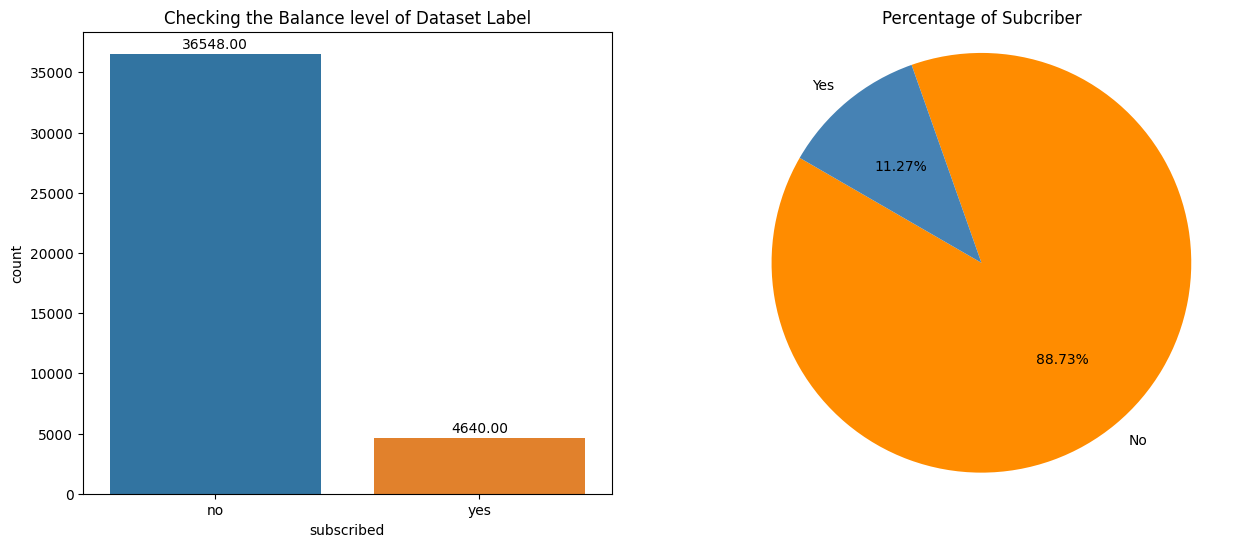

In [37]:
# Checking the balance of total label/output dataset
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(121)
plt.title("Checking the Balance level of Dataset Label")
ax = sns.countplot(x='subscribed', data=df)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'0.2f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,7), textcoords='offset points')
    
plt.subplot(122)
plt.title("Percentage of Subcriber")
subscribed_values_count = df['subscribed'].value_counts()
subscribed_size = subscribed_values_count.values.tolist()
subscribed_labels = 'No', 'Yes'
colors=['darkorange', 'steelblue']
pcs, texts, autotexts = plt.pie(subscribed_size, labels=subscribed_labels, colors=colors,
                             autopct='%2.2f%%', shadow=False, startangle=150)

plt.axis('equal')
plt.show() 

Hasil visualisasi data menunjukkan bahwa jumlah label dataset yang digunakan tidak balance, secara tidak langsung, hal ini dapat mempengaruhi kinerja model yang dihasilkan. oleh karena itu harus dilakukan proses balancing data.

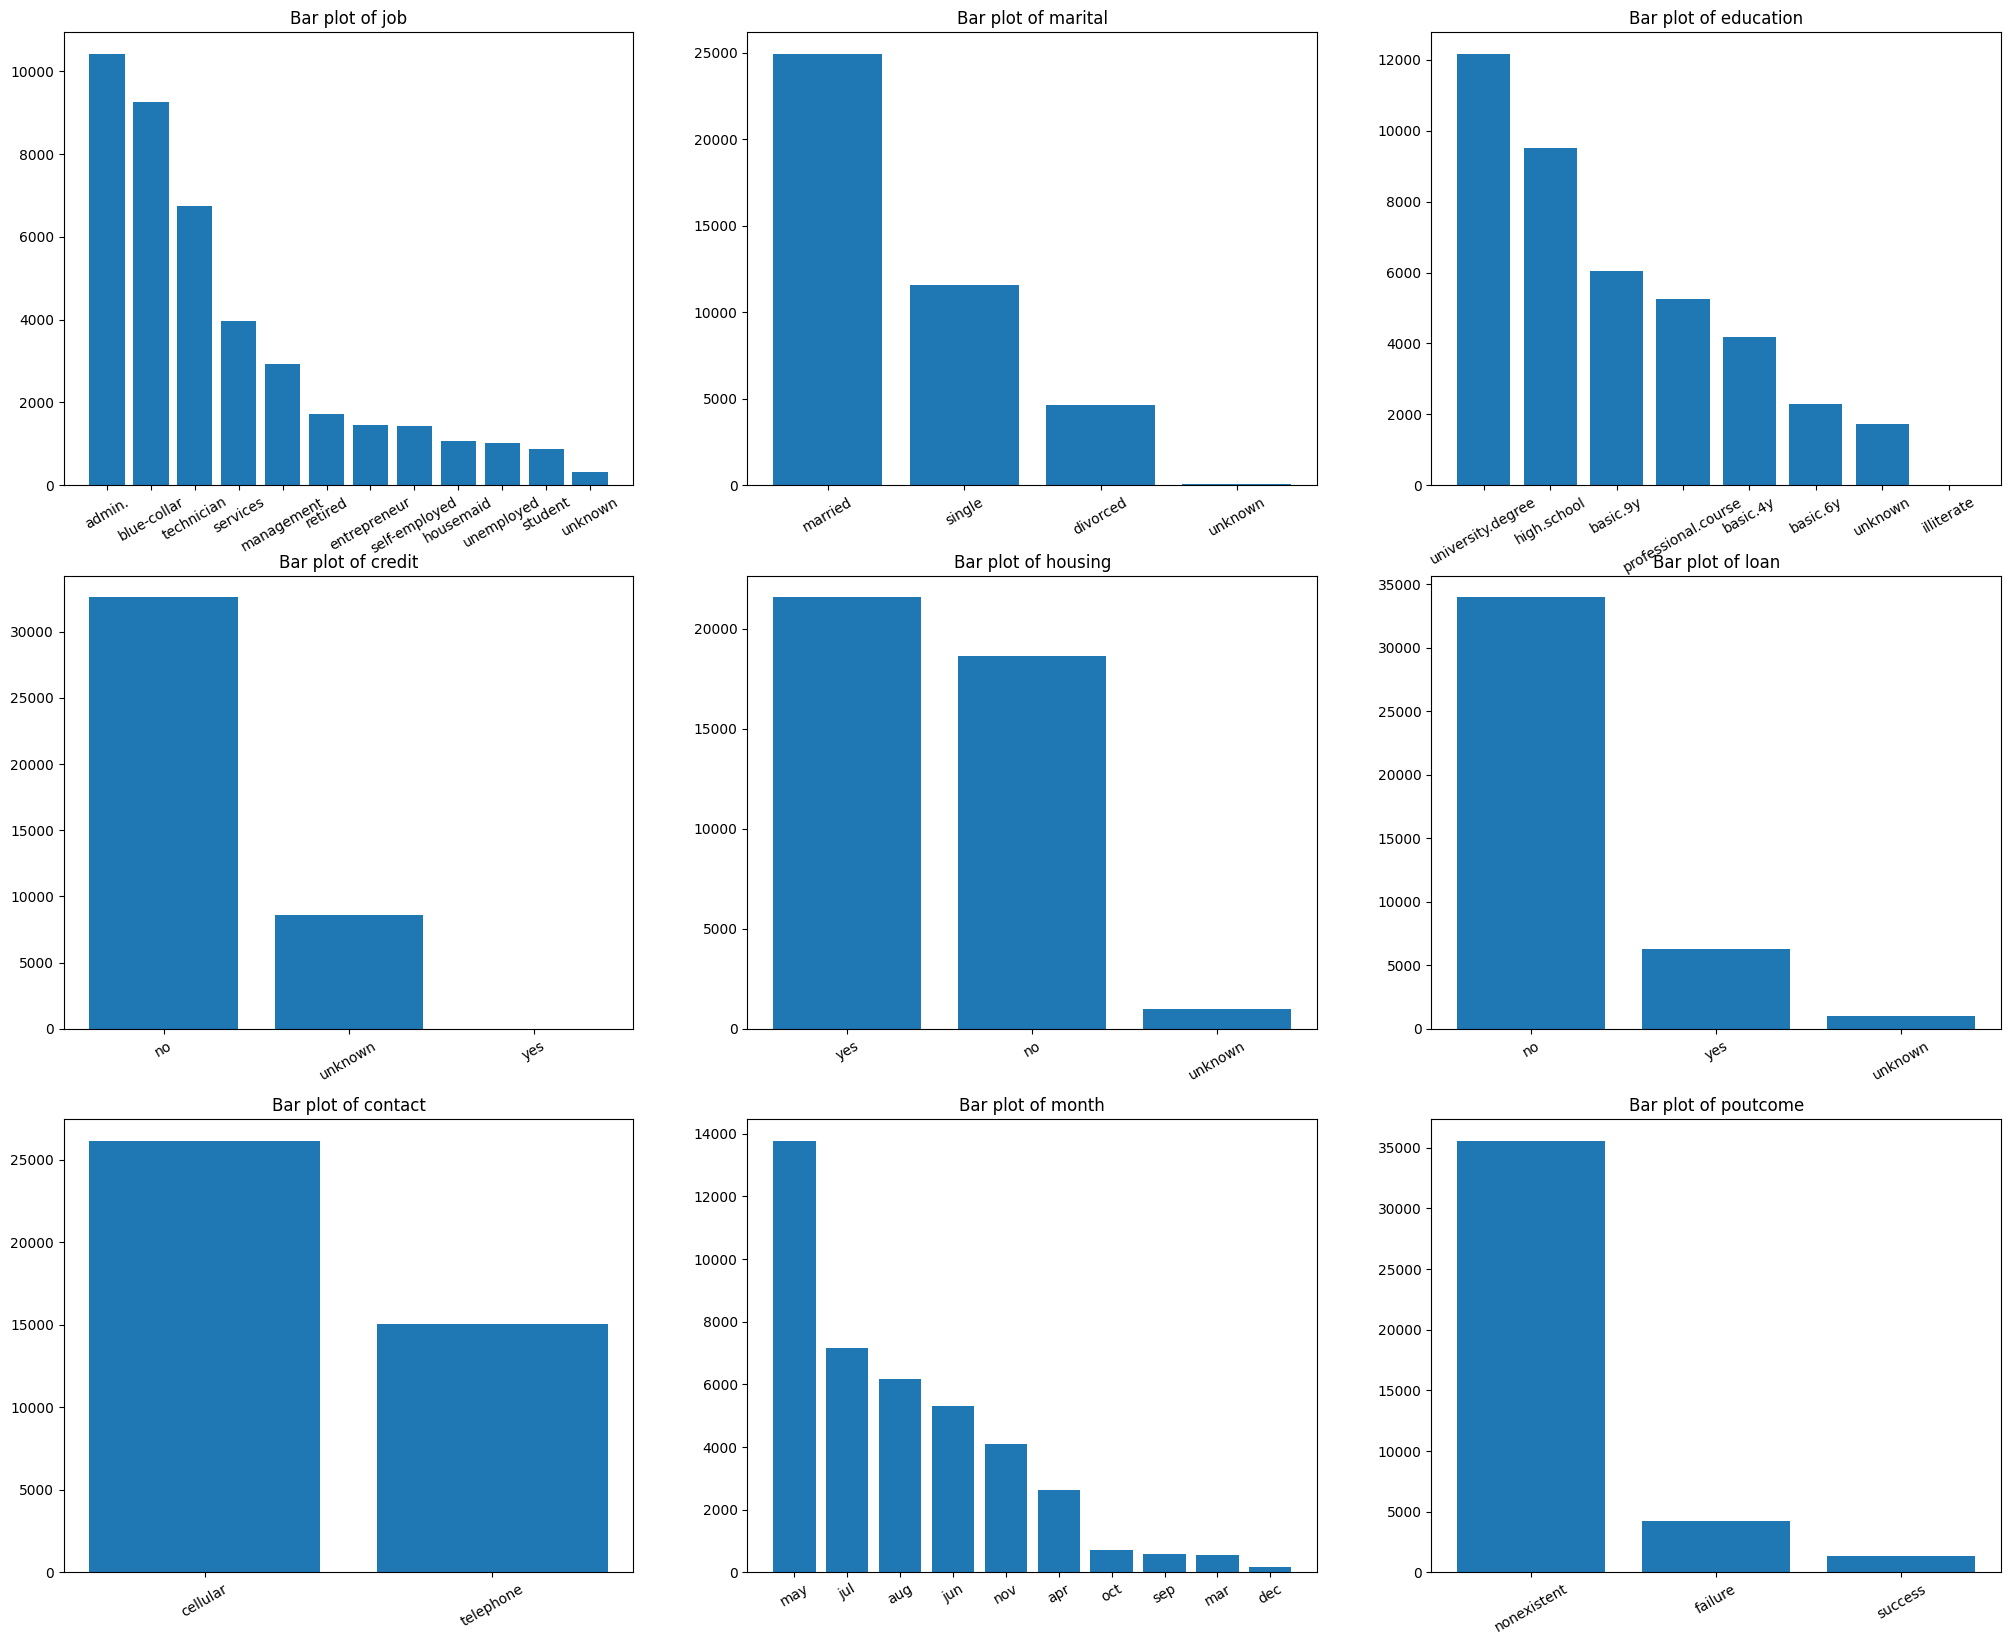

In [50]:
# Showing classification of column and count the difference

categorical_cols = ['job','marital','education','credit','housing',
                   'loan','contact','month','poutcome']
fig, ax = plt.subplots(3,3, sharex=False, sharey=False, figsize=(25,20))
count = 0
for cat_col in categorical_cols:
    value_count = df[cat_col].value_counts()
    ax_x = count//3
    ax_y = count%3
    x_range = np.arange(0, len(value_count))
    ax[ax_x, ax_y].bar(x_range, value_count.values, tick_label=value_count.index)
    ax[ax_x, ax_y].set_title(f"Bar plot of {cat_col}")
    
    for i in ax[ax_x, ax_y].get_xticklabels():
        i.set_rotation(30)
    
    count+=1
plt.show()
    